# Car Price Project

## This purpose of this project is to do some analyis on some car information, as well as create models to help predict the price of cars dependent on several factors. 

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.express as px

### Loading Data

In [10]:
carprice = pd.read_csv('car_price_prediction.csv')
carprice.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


#### Drop the 'ID' Column

In [11]:
WorkingDataSet = carprice.drop('ID', axis = 1)
WorkingDataSet

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


#### Data Exploration

In [12]:
WorkingDataSet.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

##### Car Brands

In [17]:
Values = WorkingDataSet["Category"].value_counts()

In [18]:
dfType = Values.reset_index()
dfType.columns = ['Category','Count']

In [19]:
dfType

,Category,Count
0,Sedan,8735
1,Jeep,5473
2,Hatchback,2847
3,Minivan,647
4,Coupe,532
5,Universal,364
6,Microbus,306
7,Goods wagon,233
8,Pickup,52
9,Cabriolet,36


In [20]:
fig = px.bar(dfType, x='Category', y='Count')
fig.show()

In [13]:
top10carbrands = WorkingDataSet['Manufacturer'].value_counts().head(10).index
top10carbrandsfiltered = WorkingDataSet[WorkingDataSet['Manufacturer'].isin(top10carbrands)]

In [14]:
top10carbrandsfiltered

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'LEXUS'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'HONDA'),
  Text(3, 0, 'FORD'),
  Text(4, 0, 'HYUNDAI'),
  Text(5, 0, 'TOYOTA'),
  Text(6, 0, 'MERCEDES-BENZ'),
  Text(7, 0, 'BMW'),
  Text(8, 0, 'VOLKSWAGEN'),
  Text(9, 0, 'NISSAN')])

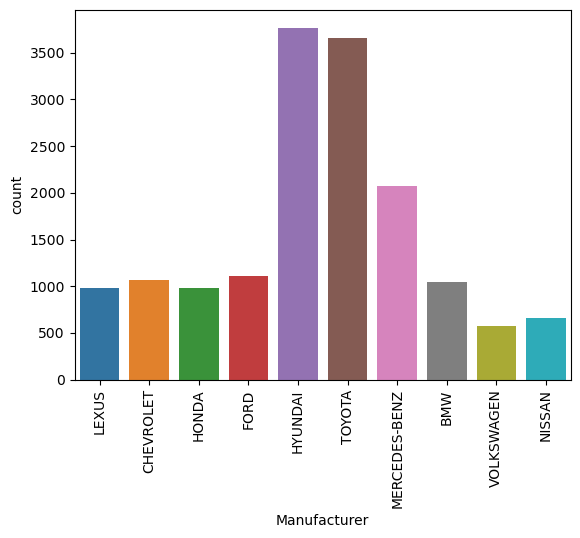

In [21]:
sns.countplot(x='Manufacturer',data=top10carbrandsfiltered)
plt.xticks(rotation=90)

##### Production Year

In [22]:
Values = WorkingDataSet["Prod. year"].value_counts()

In [23]:
dfType = Values.reset_index()
dfType.columns = ['Category','Count']

In [24]:
dfType

,Category,Count
0,2012,2155
1,2014,2124
2,2013,1963
3,2011,1612
4,2015,1549
5,2010,1482
6,2016,1476
7,2017,959
8,2008,737
9,2009,601


In [25]:
fig = px.bar(dfType, x='Category', y='Count')
fig.show()

In [26]:
top10ProdYear = WorkingDataSet["Prod. year"].value_counts().head(10).index
top10ProdYearfiltered = WorkingDataSet[WorkingDataSet["Prod. year"].isin(top10ProdYear)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017')])

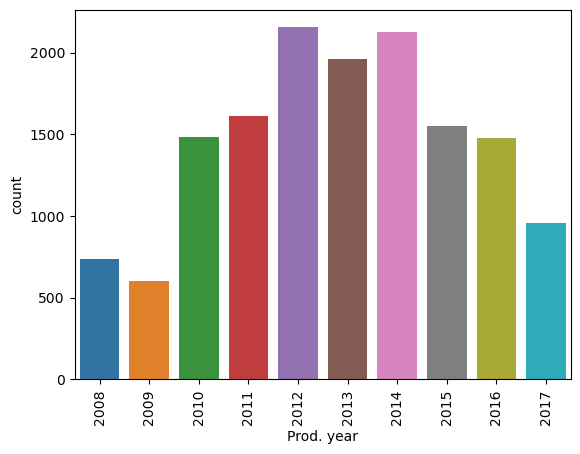

In [27]:
sns.countplot(x="Prod. year",data=top10ProdYearfiltered)
plt.xticks(rotation=90)

##### Vehicle Type

In [29]:
Values = WorkingDataSet['Category'].value_counts()

In [30]:
dfType = Values.reset_index()
dfType.columns = ['Category','Count']

In [32]:
dfType

,Category,Count
0,Sedan,8735
1,Jeep,5473
2,Hatchback,2847
3,Minivan,647
4,Coupe,532
5,Universal,364
6,Microbus,306
7,Goods wagon,233
8,Pickup,52
9,Cabriolet,36


In [33]:
fig = px.pie(dfType, values='Count', names='Category')
fig.show()

In [34]:
Values = WorkingDataSet["Category"].value_counts()

In [35]:
dfType = Values.reset_index()
dfType.columns = ['CarType','Count']

Text(0.5, 1.0, 'Pie Chart of Values by Category')

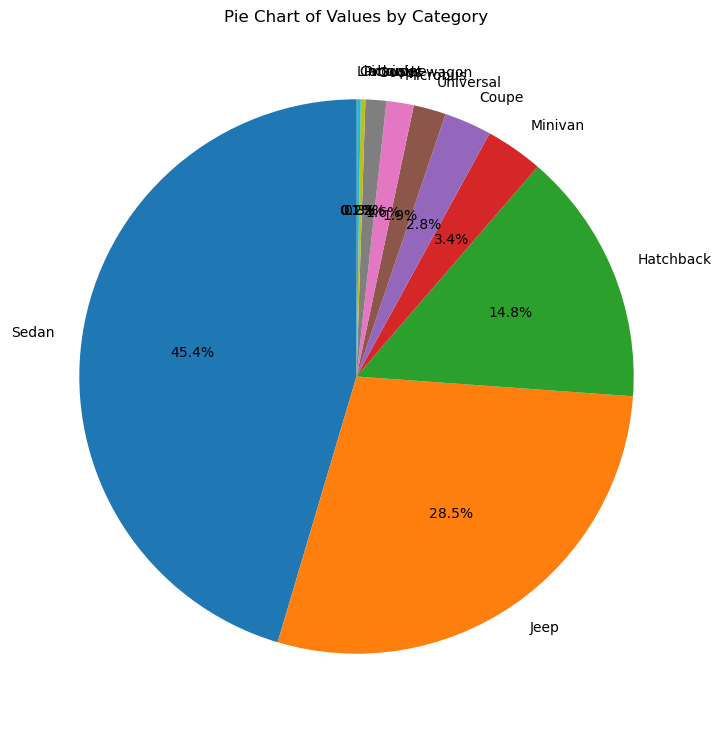

In [36]:
plt.figure(figsize = (9,9))
plt.pie(dfType['Count'], labels = dfType['CarType'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Values by Category")

##### GearBox

In [37]:
Values = WorkingDataSet["Gear box type"].value_counts()

In [38]:
dfType = Values.reset_index()
dfType.columns = ["Gear box type",'Count']

In [39]:
dfType

,Gear box type,Count
0,Automatic,13514
1,Tiptronic,3102
2,Manual,1874
3,Variator,746


In [40]:
fig = px.pie(dfType, values='Count', names='Gear box type')
fig.show()

In [41]:
Values = WorkingDataSet["Gear box type"].value_counts()

In [42]:
dfType = Values.reset_index()
dfType.columns = ['Gear Box Type','Count']

Text(0.5, 1.0, 'Pie Chart of Values by Category')

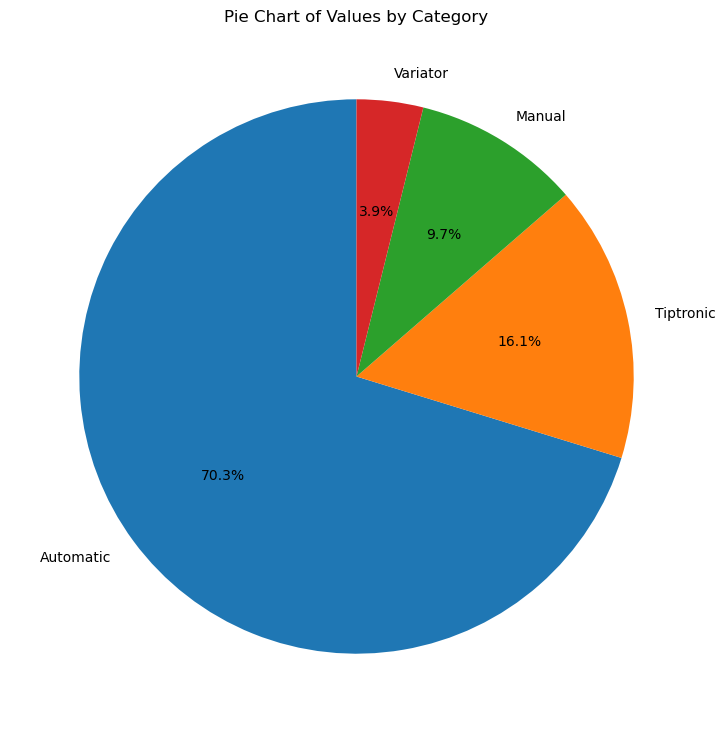

In [43]:
plt.figure(figsize = (9,9))
plt.pie(dfType['Count'], labels = dfType['Gear Box Type'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Values by Category")

##### Cylinders

In [44]:
Values = WorkingDataSet["Cylinders"].value_counts()

In [45]:
dfType = Values.reset_index()
dfType.columns = ['Cylinders','Count']

In [46]:
dfType

,Cylinders,Count
0,4.0,14366
1,6.0,3462
2,8.0,991
3,5.0,169
4,3.0,107
5,2.0,42
6,1.0,38
7,12.0,38
8,10.0,12
9,16.0,5


In [48]:
fig = px.bar(dfType, x='Cylinders', y='Count')
fig.show()

In [51]:
fig = px.pie(dfType, values='Count', names='Cylinders')
fig.show()

In [49]:
top10Cylinders = WorkingDataSet["Cylinders"].value_counts().head(10).index
top10Cylindersfiltered = WorkingDataSet[WorkingDataSet["Cylinders"].isin(top10Cylinders)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '10.0'),
  Text(8, 0, '12.0'),
  Text(9, 0, '16.0')])

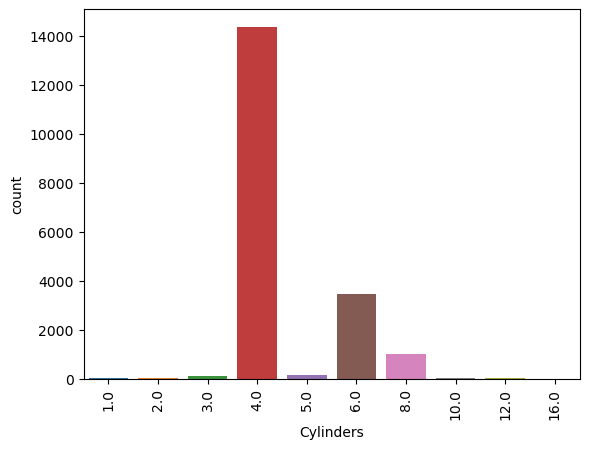

In [50]:
sns.countplot(x="Cylinders",data=top10Cylindersfiltered)
plt.xticks(rotation=90)

##### Mileage

In [56]:
Values = WorkingDataSet["Mileage"].value_counts().head(10)

In [57]:
dfType = Values.reset_index()
dfType.columns = ['Mileage','Count']

In [58]:
dfType

,Mileage,Count
0,0 km,721
1,200000 km,183
2,150000 km,161
3,160000 km,120
4,100000 km,119
5,180000 km,117
6,1000 km,102
7,170000 km,99
8,120000 km,98
9,130000 km,86


In [59]:
fig = px.bar(dfType, x='Mileage', y='Count')
fig.show()

In [60]:
top10Mileage = WorkingDataSet["Mileage"].value_counts().head(10).index
top10Mileagefiltered = WorkingDataSet[WorkingDataSet["Mileage"].isin(top10Mileage)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '200000 km'),
  Text(1, 0, '0 km'),
  Text(2, 0, '180000 km'),
  Text(3, 0, '170000 km'),
  Text(4, 0, '130000 km'),
  Text(5, 0, '160000 km'),
  Text(6, 0, '150000 km'),
  Text(7, 0, '100000 km'),
  Text(8, 0, '120000 km'),
  Text(9, 0, '1000 km')])

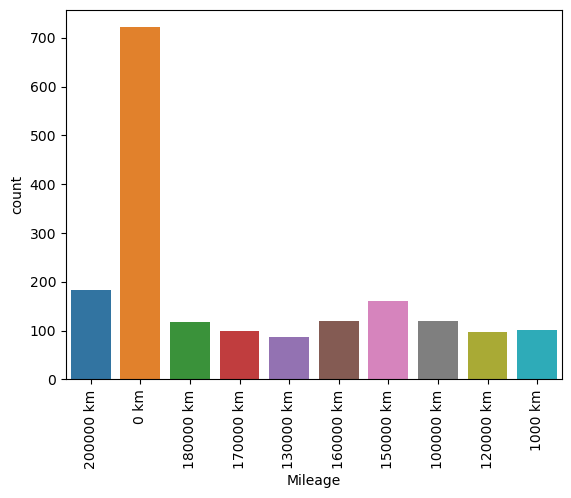

In [61]:
sns.countplot(x="Mileage",data=top10Mileagefiltered)
plt.xticks(rotation=90)

#### Cars by Color

Text(0.5, 1.0, 'Pie Chart of Cars by Colors')

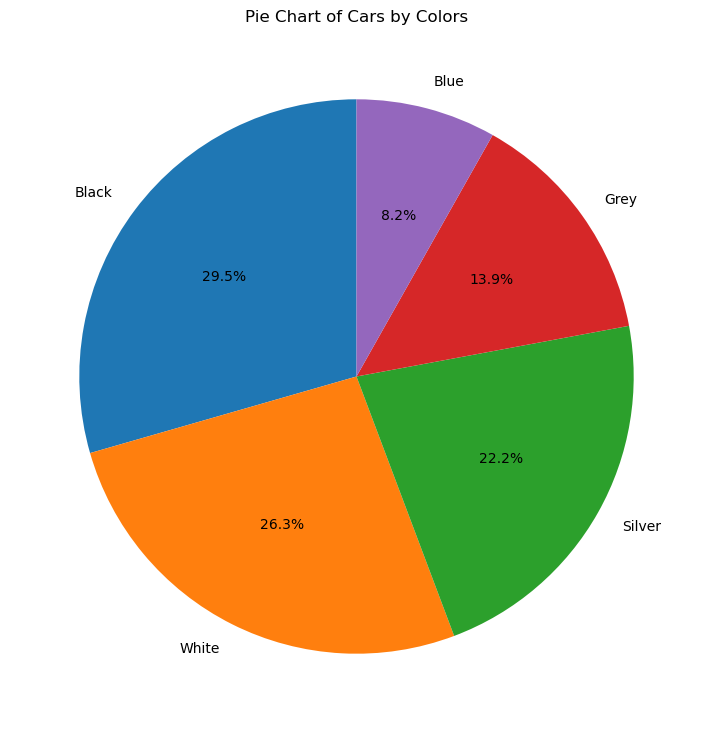

In [71]:
Values = WorkingDataSet["Color"].value_counts()
top10color = Values.head(5)
dfType = top10color.reset_index()
dfType.columns = ['Color','Count']
plt.figure(figsize = (9,9))
plt.pie(dfType['Count'], labels = dfType['Color'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Cars by Colors")

In [75]:
fig = px.pie(dfType, values='Count', names='Color')
fig.show()

### Removing Outliers

In [62]:
def clean_miles(mileage):
    return float(mileage.split(" ")[0])

In [63]:
WorkingDataSet["Mileage"] = WorkingDataSet["Mileage"].apply(clean_miles)
WorkingDataSet["Mileage"]

0        186005.0
1        192000.0
2        200000.0
3        168966.0
4         91901.0
           ...   
19231    300000.0
19232    161600.0
19233    116365.0
19234     51258.0
19235    186923.0
Name: Mileage, Length: 19236, dtype: float64

In [64]:
Q1 = WorkingDataSet["Mileage"].quantile(.25)
#Q1
Q3 = WorkingDataSet["Mileage"].quantile(.75)
#Q3

In [65]:
IQR = Q3 - Q1

In [66]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [67]:
Outliers = WorkingDataSet[(WorkingDataSet['Mileage'] < lower_bound) | (WorkingDataSet['Mileage'] > upper_bound)]

In [68]:
Data_No_Outliers = WorkingDataSet[(WorkingDataSet['Mileage'] >= lower_bound) | (WorkingDataSet['Mileage'] <= upper_bound)]
Data_No_Outliers

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [69]:
Data_No_Outliers["Levy"] = Data_No_Outliers["Levy"].str.replace('-','0')

In [72]:
Data_No_Outliers

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [73]:
Data_No_Outliers.groupby("Manufacturer")["Price"].mean().nlargest(3)

Manufacturer
LAMBORGHINI    872946.000000
BENTLEY        197574.500000
OPEL            73305.617128
Name: Price, dtype: float64

In [74]:
List = Data_No_Outliers.columns

#### One Hot Encoding

In [76]:
for i in range(0,len(List)):
    print(Data_No_Outliers[List[i]].dtypes)

int64
object
object
object
int64
object
object
object
object
float64
float64
object
object
object
object
object
int64


In [77]:
categorical_features = Data_No_Outliers.select_dtypes(include=['object']).columns

In [78]:
one_hot_df = pd.get_dummies(Data_No_Outliers, columns=categorical_features, )
one_hot_df

,Price,Prod. year,Mileage,Cylinders,Airbags,Levy_0,Levy_1011,Levy_1016,Levy_1017,Levy_1018,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,2010,186005.0,6.0,12,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,16621,2011,192000.0,6.0,8,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,8467,2006,200000.0,4.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3607,2011,168966.0,4.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11726,2014,91901.0,4.0,4,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,1999,300000.0,4.0,5,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
19232,15681,2011,161600.0,4.0,8,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19233,26108,2010,116365.0,4.0,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19234,5331,2007,51258.0,4.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Models

#### XGBoost Model

In [79]:
import xgboost

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [81]:
data, labels = one_hot_df.drop("Price",axis = 1), one_hot_df["Price"]

In [82]:
data

,Prod. year,Mileage,Cylinders,Airbags,Levy_0,Levy_1011,Levy_1016,Levy_1017,Levy_1018,Levy_1024,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,2010,186005.0,6.0,12,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2011,192000.0,6.0,8,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2006,200000.0,4.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,168966.0,4.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2014,91901.0,4.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1999,300000.0,4.0,5,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
19232,2011,161600.0,4.0,8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19233,2010,116365.0,4.0,4,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19234,2007,51258.0,4.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size = 0.3, random_state = 42)

In [84]:
X_train

,Prod. year,Mileage,Cylinders,Airbags,Levy_0,Levy_1011,Levy_1016,Levy_1017,Levy_1018,Levy_1024,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
13425,2015,94000.0,4.0,8,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4237,2012,255406.0,8.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7229,2012,150246.0,4.0,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7646,2013,112200.0,4.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4723,2014,71466.0,4.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2018,11953.0,4.0,4,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11964,2018,35058.0,4.0,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5390,2014,110715.0,6.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
860,2005,162000.0,6.0,12,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [85]:
y_train

13425    23521
4237     54568
7229      2666
7646     29445
4723     11262
         ...  
11284    44752
11964    18817
5390     16621
860      12544
15795     5645
Name: Price, Length: 13465, dtype: int64

In [86]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
preds = regressor.predict(X_test)

In [88]:
preds

array([22726.883 , 17690.316 , 10403.803 , ...,  6596.407 ,  4424.5605,
       10841.752 ], dtype=float32)

In [101]:
y_test_array = np.array(y_test)
y_test_array

array([27284, 10349, 40769, ..., 15681,  4077,  6899])

In [89]:
len(preds)

5771

In [90]:
mean_absolute_error(preds, y_test)

6026.263076164842

With the MAE being 6026, this mean in terms of this model and this code the average error on the price of cars will have an average differential of $6026 dollars each way from the actual price of the car. 

In [91]:
y_test

736      27284
8674     10349
5971     40769
1957     38737
11075    42102
         ...  
14540       60
19093    11290
2057     15681
8309      4077
9231      6899
Name: Price, Length: 5771, dtype: int64

In [92]:
Overall_Mean_Price = y_test.mean()
Overall_Mean_Price

17305.747877317623

#### Scatterplot of predicted values and actual values

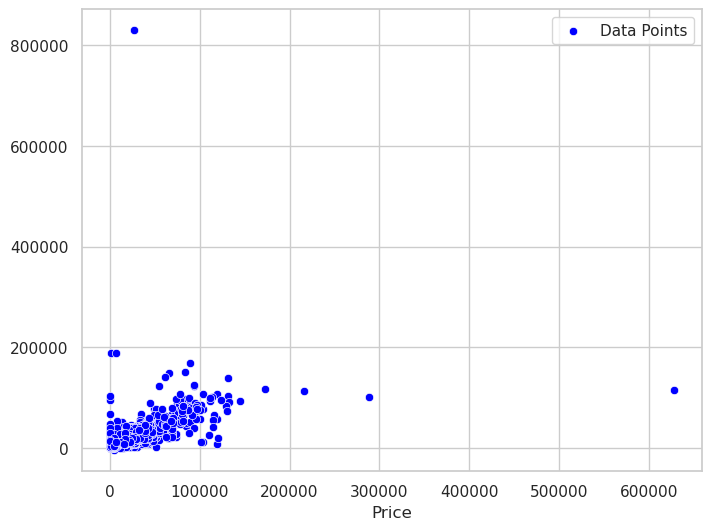

In [93]:
sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.scatterplot(x=y_test, y=preds, marker='o', color='blue', label='Data Points')
plt.legend()

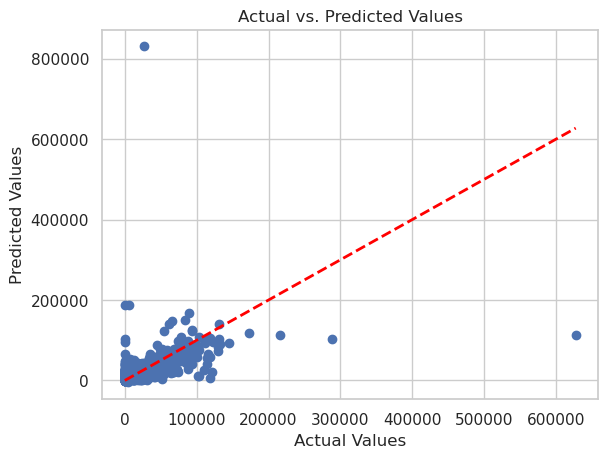

In [95]:
plt.scatter(y_test, preds)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.show()

### Other Models

##### What I would like to see is if I can create a function/prediction model that I feel has some use: whether or not a car is going to fall below a certain price
##### given the market of cars is so horrible right now (as of 9/20/2023)

### Logistic Regression Model

In [103]:
Data_No_Outliers

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
data

In [104]:
threshold = 17000

# Create a binary label indicating if the car price is below the threshold
Data_No_Outliers['Below_Threshold'] = (Data_No_Outliers['Price'] < threshold).astype(int)

In [105]:
Data_No_Outliers

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Below_Threshold
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,1
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,1
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,1
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,1


In [119]:
features = Data_No_Outliers[["Manufacturer","Prod. year","Leather interior","Fuel type","Engine volume","Gear box type","Drive wheels","Doors","Cylinders"]]
features

,Manufacturer,Prod. year,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Cylinders
0,LEXUS,2010,Yes,Hybrid,3.5,Automatic,4x4,04-May,6.0
1,CHEVROLET,2011,No,Petrol,3,Tiptronic,4x4,04-May,6.0
2,HONDA,2006,No,Petrol,1.3,Variator,Front,04-May,4.0
3,FORD,2011,Yes,Hybrid,2.5,Automatic,4x4,04-May,4.0
4,HONDA,2014,Yes,Petrol,1.3,Automatic,Front,04-May,4.0
...,...,...,...,...,...,...,...,...,...
19231,MERCEDES-BENZ,1999,Yes,CNG,2.0 Turbo,Manual,Rear,02-Mar,4.0
19232,HYUNDAI,2011,Yes,Petrol,2.4,Tiptronic,Front,04-May,4.0
19233,HYUNDAI,2010,Yes,Diesel,2,Automatic,Front,04-May,4.0
19234,CHEVROLET,2007,Yes,Diesel,2,Automatic,Front,04-May,4.0


In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
encoder = LabelEncoder()

In [122]:
categorical_features = features.select_dtypes(include=['object']).columns
categorical_features

Index(['Manufacturer', 'Leather interior', 'Fuel type', 'Engine volume',
       'Gear box type', 'Drive wheels', 'Doors'],
      dtype='object')

In [123]:
featuresEncoded = features.copy()
featuresEncoded[categorical_features] = featuresEncoded[categorical_features].apply(encoder.fit_transform)
featuresEncoded

,Manufacturer,Prod. year,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Cylinders
0,32,2010,1,2,63,0,0,1,6.0
1,8,2011,0,5,56,2,0,1,6.0
2,21,2006,0,5,22,3,1,1,4.0
3,16,2011,1,2,46,0,0,1,4.0
4,21,2014,1,5,22,0,1,1,4.0
...,...,...,...,...,...,...,...,...,...
19231,36,1999,1,0,37,1,2,0,4.0
19232,23,2011,1,5,44,2,1,1,4.0
19233,23,2010,1,1,36,0,1,1,4.0
19234,8,2007,1,1,36,0,1,1,4.0


In [124]:
featuresEncoded

,Manufacturer,Prod. year,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Cylinders
0,32,2010,1,2,63,0,0,1,6.0
1,8,2011,0,5,56,2,0,1,6.0
2,21,2006,0,5,22,3,1,1,4.0
3,16,2011,1,2,46,0,0,1,4.0
4,21,2014,1,5,22,0,1,1,4.0
...,...,...,...,...,...,...,...,...,...
19231,36,1999,1,0,37,1,2,0,4.0
19232,23,2011,1,5,44,2,1,1,4.0
19233,23,2010,1,1,36,0,1,1,4.0
19234,8,2007,1,1,36,0,1,1,4.0


In [126]:
mappingFuelType = dict(enumerate(features['Fuel type'].astype('category').cat.categories))
mappingCylinders = dict(enumerate(features['Cylinders'].astype('category').cat.categories))
mappingProductionYear = dict(enumerate(features['Prod. year'].astype('category').cat.categories))
mappingManufacturer = dict(enumerate(features['Manufacturer'].astype('category').cat.categories))
mappingEngineVolume = dict(enumerate(features['Engine volume'].astype('category').cat.categories))
mappingDoors = dict(enumerate(features['Doors'].astype('category').cat.categories))
mappingDriveWheels = dict(enumerate(features['Drive wheels'].astype('category').cat.categories))
mappingGearBoxType = dict(enumerate(features['Gear box type'].astype('category').cat.categories))

In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(featuresEncoded, Data_No_Outliers['Below_Threshold'], test_size=0.3, random_state=42)

In [128]:
from sklearn.linear_model import LogisticRegression

In [130]:
# Create and train a Logistic Regression model
BelowPriceModel = LogisticRegression(max_iter = 1000, random_state = 42)
BelowPriceModel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [135]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [132]:
# Evaluate the model's performance
y_pred = BelowPriceModel.predict(X_test)

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy *100)

Accuracy: 66.4182983884942


In [139]:
roc_auc = roc_auc_score(y_test, BelowPriceModel.predict_proba(X_test)[:, 1])

In [140]:
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6641829838849419
ROC AUC Score: 0.6234653164388828


In [141]:
X_train

,Manufacturer,Prod. year,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Cylinders
13425,23,2015,1,2,44,0,1,1,4.0
4237,32,2012,1,5,80,0,0,1,8.0
7229,28,2012,1,5,44,0,1,1,4.0
7646,58,2013,1,5,26,0,1,1,4.0
4723,23,2014,1,4,36,0,1,1,4.0
...,...,...,...,...,...,...,...,...,...
11284,54,2018,1,5,28,0,1,1,4.0
11964,58,2018,1,2,46,0,1,1,4.0
5390,5,2014,1,1,56,0,0,1,6.0
860,5,2005,1,5,46,2,2,1,6.0


In [142]:
new_car_features = np.array([25,2016,0,4,45,2,0,4,6.0])
new_car_features = new_car_features.reshape(1, -1)

In [144]:
probability_below_threshold = BelowPriceModel.predict_proba(new_car_features)[:, 1]
print("Probability below threshold:", probability_below_threshold[0])

Probability below threshold: 0.6031946091410902


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



##### So for the car inputs given, the probability of this with these set of features car being under 17,000 is about 60%; not very high

### Creating Function 

#### *I will be including miles (km) is this logistic model as well, as building this function for all cases... eventually*

#### **Disclaimer: this data is 4 years old, so doesnt adjust for market costs, inflation, the state of the economy etc.**

##### Features to potential use: Manufacturer, Prod. year, Leather interior, Fuel type, Engine volume, Gear box type, Drive wheels, Doors, Cylinders

In [192]:
import numpy as np

In [197]:
mappingFuelType

{0: 'CNG',
 1: 'Diesel',
 2: 'Hybrid',
 3: 'Hydrogen',
 4: 'LPG',
 5: 'Petrol',
 6: 'Plug-in Hybrid'}

In [198]:
mappingCylinders

{0: 1.0,
 1: 2.0,
 2: 3.0,
 3: 4.0,
 4: 5.0,
 5: 6.0,
 6: 7.0,
 7: 8.0,
 8: 9.0,
 9: 10.0,
 10: 12.0,
 11: 14.0,
 12: 16.0}

In [199]:
mappingProductionYear

{0: 1939,
 1: 1943,
 2: 1947,
 3: 1953,
 4: 1957,
 5: 1964,
 6: 1965,
 7: 1968,
 8: 1973,
 9: 1974,
 10: 1976,
 11: 1977,
 12: 1978,
 13: 1980,
 14: 1981,
 15: 1982,
 16: 1983,
 17: 1984,
 18: 1985,
 19: 1986,
 20: 1987,
 21: 1988,
 22: 1989,
 23: 1990,
 24: 1991,
 25: 1992,
 26: 1993,
 27: 1994,
 28: 1995,
 29: 1996,
 30: 1997,
 31: 1998,
 32: 1999,
 33: 2000,
 34: 2001,
 35: 2002,
 36: 2003,
 37: 2004,
 38: 2005,
 39: 2006,
 40: 2007,
 41: 2008,
 42: 2009,
 43: 2010,
 44: 2011,
 45: 2012,
 46: 2013,
 47: 2014,
 48: 2015,
 49: 2016,
 50: 2017,
 51: 2018,
 52: 2019,
 53: 2020}

In [200]:
mappingManufacturer

{0: 'ACURA',
 1: 'ALFA ROMEO',
 2: 'ASTON MARTIN',
 3: 'AUDI',
 4: 'BENTLEY',
 5: 'BMW',
 6: 'BUICK',
 7: 'CADILLAC',
 8: 'CHEVROLET',
 9: 'CHRYSLER',
 10: 'CITROEN',
 11: 'DAEWOO',
 12: 'DAIHATSU',
 13: 'DODGE',
 14: 'FERRARI',
 15: 'FIAT',
 16: 'FORD',
 17: 'GAZ',
 18: 'GMC',
 19: 'GREATWALL',
 20: 'HAVAL',
 21: 'HONDA',
 22: 'HUMMER',
 23: 'HYUNDAI',
 24: 'INFINITI',
 25: 'ISUZU',
 26: 'JAGUAR',
 27: 'JEEP',
 28: 'KIA',
 29: 'LAMBORGHINI',
 30: 'LANCIA',
 31: 'LAND ROVER',
 32: 'LEXUS',
 33: 'LINCOLN',
 34: 'MASERATI',
 35: 'MAZDA',
 36: 'MERCEDES-BENZ',
 37: 'MERCURY',
 38: 'MINI',
 39: 'MITSUBISHI',
 40: 'MOSKVICH',
 41: 'NISSAN',
 42: 'OPEL',
 43: 'PEUGEOT',
 44: 'PONTIAC',
 45: 'PORSCHE',
 46: 'RENAULT',
 47: 'ROLLS-ROYCE',
 48: 'ROVER',
 49: 'SAAB',
 50: 'SATURN',
 51: 'SCION',
 52: 'SEAT',
 53: 'SKODA',
 54: 'SSANGYONG',
 55: 'SUBARU',
 56: 'SUZUKI',
 57: 'TESLA',
 58: 'TOYOTA',
 59: 'UAZ',
 60: 'VAZ',
 61: 'VOLKSWAGEN',
 62: 'VOLVO',
 63: 'ZAZ',
 64: 'სხვა'}

In [201]:
mappingEngineVolume

{0: '0',
 1: '0.1',
 2: '0.2',
 3: '0.2 Turbo',
 4: '0.3',
 5: '0.3 Turbo',
 6: '0.4',
 7: '0.4 Turbo',
 8: '0.5',
 9: '0.6',
 10: '0.6 Turbo',
 11: '0.7',
 12: '0.7 Turbo',
 13: '0.8',
 14: '0.8 Turbo',
 15: '0.9',
 16: '1',
 17: '1.0 Turbo',
 18: '1.1',
 19: '1.1 Turbo',
 20: '1.2',
 21: '1.2 Turbo',
 22: '1.3',
 23: '1.3 Turbo',
 24: '1.4',
 25: '1.4 Turbo',
 26: '1.5',
 27: '1.5 Turbo',
 28: '1.6',
 29: '1.6 Turbo',
 30: '1.7',
 31: '1.7 Turbo',
 32: '1.8',
 33: '1.8 Turbo',
 34: '1.9',
 35: '1.9 Turbo',
 36: '2',
 37: '2.0 Turbo',
 38: '2.1',
 39: '2.1 Turbo',
 40: '2.2',
 41: '2.2 Turbo',
 42: '2.3',
 43: '2.3 Turbo',
 44: '2.4',
 45: '2.4 Turbo',
 46: '2.5',
 47: '2.5 Turbo',
 48: '2.6',
 49: '2.7',
 50: '2.7 Turbo',
 51: '2.8',
 52: '2.8 Turbo',
 53: '2.9',
 54: '2.9 Turbo',
 55: '20',
 56: '3',
 57: '3.0 Turbo',
 58: '3.1',
 59: '3.2',
 60: '3.2 Turbo',
 61: '3.3',
 62: '3.4',
 63: '3.5',
 64: '3.5 Turbo',
 65: '3.6',
 66: '3.6 Turbo',
 67: '3.7',
 68: '3.7 Turbo',
 69: '3.8',

In [202]:
mappingDoors

{0: '02-Mar', 1: '04-May', 2: '>5'}

In [203]:
mappingDriveWheels

{0: '4x4', 1: 'Front', 2: 'Rear'}

In [204]:
mappingGearBoxType 

{0: 'Automatic', 1: 'Manual', 2: 'Tiptronic', 3: 'Variator'}

In [205]:
featuresEncoded

,Manufacturer,Prod. year,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Doors,Cylinders
0,32,2010,1,2,63,0,0,1,6.0
1,8,2011,0,5,56,2,0,1,6.0
2,21,2006,0,5,22,3,1,1,4.0
3,16,2011,1,2,46,0,0,1,4.0
4,21,2014,1,5,22,0,1,1,4.0
...,...,...,...,...,...,...,...,...,...
19231,36,1999,1,0,37,1,2,0,4.0
19232,23,2011,1,5,44,2,1,1,4.0
19233,23,2010,1,1,36,0,1,1,4.0
19234,8,2007,1,1,36,0,1,1,4.0


In [206]:
average_rounded = featuresEncoded.mean().round().astype(int)

average_rounded

Manufacturer          33
Prod. year          2011
Leather interior       1
Fuel type              3
Engine volume         41
Gear box type          1
Drive wheels           1
Doors                  1
Cylinders              5
dtype: int64

In [211]:
AverageDataFrame = average_rounded.to_frame()
AverageDataFrame

,0
Manufacturer,33
Prod. year,2011
Leather interior,1
Fuel type,3
Engine volume,41
Gear box type,1
Drive wheels,1
Doors,1
Cylinders,5


In [214]:
AverageDataFrame.columns = ["Values"]

In [220]:
AverageDataFrame["Values"]

Manufacturer          33
Prod. year          2011
Leather interior       1
Fuel type              3
Engine volume         41
Gear box type          1
Drive wheels           1
Doors                  1
Cylinders              5
Name: Values, dtype: int64

In [196]:
ArraypfDictionary = [mappingFuelType,mappingCylinders,mappingProductionYear,mappingManufacturer,mappingEngineVolume,mappingDoors,mappingDriveWheels,mappingGearBoxType]

##### Car_price_predictor function

In [231]:
def car_price_predictor(Manufacturer,ProdYear,Interior,Fuel,Engine,GearBox,Wheels,Doors,Cylinders,maxprice,dataframe):
    
    threshold = maxprice

    # Create a binary label indicating if the car price is below the threshold
    dataframe['Below_Threshold'] = (dataframe['Price'] < threshold).astype(int)
    
    features = dataframe[["Manufacturer","Prod. year","Leather interior","Fuel type","Engine volume","Gear box type","Drive wheels","Doors","Cylinders"]]
    features
    
    encoder = LabelEncoder()
    
    categorical_features = features.select_dtypes(include=['object']).columns
    categorical_features
    
    featuresEncoded = features.copy()
    featuresEncoded[categorical_features] = featuresEncoded[categorical_features].apply(encoder.fit_transform)
    featuresEncoded
    
    BelowPriceModel = LogisticRegression(max_iter = 1000, random_state = 42)

    
    X_train, X_test, y_train, y_test = train_test_split(featuresEncoded, dataframe['Below_Threshold'], test_size=0.3, random_state=42)
    
    
    BelowPriceModel.fit(X_train, y_train)
    
    # Evaluate the model's performance
    y_pred = BelowPriceModel.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy *100)
    
    print("--------------------")
    
    roc_auc = roc_auc_score(y_test, BelowPriceModel.predict_proba(X_test)[:, 1])
    print("ROC AUC Score:", roc_auc)
    
    print("--------------------")
    
    # Convert the inputs to a list
    features = [Manufacturer,ProdYear,Interior,Fuel,Engine,GearBox,Wheels,Doors,Cylinders]
    new_car_features = np.array(features)
    new_car_features = new_car_features.reshape(1, -1)
    probability_below_threshold = BelowPriceModel.predict_proba(new_car_features)[:, 1]
    print("Probability the car is going to fall under the your max price:", probability_below_threshold[0])
    
    



##### Example usage:

##### This function is just for easy use; this function could defeinietely be developed more, but this just a showcase project.

##### One thing I want to note is that when you change the 'Cylinders' last option the probability actually jumps. I account this to being less V8 cars in this dataset, which means the probability is going to jump like that. 

In [232]:
car_price_predictor(25,2016,0,4,45,2,0,4,6.0,17000,Data_No_Outliers)

Accuracy: 66.4182983884942
--------------------
ROC AUC Score: 0.6234653164388828
--------------------
Probability the car is going to fall under the your max price: 0.6031946091410902


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [233]:
car_price_predictor(25,2016,0,4,45,2,0,4,8.0,17000,Data_No_Outliers)

Accuracy: 66.4182983884942
--------------------
ROC AUC Score: 0.6234653164388828
--------------------
Probability the car is going to fall under the your max price: 0.7402972364637853


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

